In [1]:
import pandas as pd
import os


In [2]:
# CSV file 
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"

df = pd.read_csv(csv_path)

print("Loaded CSV with rows:", len(df))
df.head()


Loaded CSV with rows: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [3]:

image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"


df['exists'] = df['filename'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))


print("Matched image files:", df['exists'].sum(), "/", len(df))


df = df[df['exists']].copy()
df = df[['filename', 'label']]
df.head()


Matched image files: 84 / 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [4]:
final_csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
df.to_csv(final_csv_path, index=False)
print("Final verified labels saved at:", final_csv_path)


Final verified labels saved at: C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv


In [5]:
print(f" TASK 1 COMPLETE: {len(df)} image-label pairs are verified and ready.")
df.sample(5)


 TASK 1 COMPLETE: 84 image-label pairs are verified and ready.


,filename,label
9,IMG_20220413_09235624.jpg,1
4,IMG_20220411_09235389.jpg,0
23,IMG_20220421_09236510.jpg,0
20,IMG_20220419_09236192.jpg,0
41,IMG_20220427_09237235.jpg,0


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [7]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"

df = pd.read_csv(csv_path)

print(f"Total samples: {len(df)}")
df.head()


Total samples: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [8]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
df = pd.read_csv(csv_path)

print(df.head())                    # View top rows
print(df['label'].unique())         # Check unique label values
print(df['label'].value_counts())   # Count how many of each class


                    filename label
0    IMG_20220411_106246.jpg     1
1    IMG_20220411_106256.jpg     0
2    IMG_20220411_106258.jpg     0
3  IMG_20220411_09235385.jpg     0
4  IMG_20220411_09235389.jpg     0
['1' '0' 'result not found']
label
0                   66
1                   16
result not found     2
Name: count, dtype: int64


In [9]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Input paths
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"
output_dir = os.path.join(image_dir, "augmented")
os.makedirs(output_dir, exist_ok=True)

# Load CSV and keep only COVID-positive rows
df = pd.read_csv(csv_path)
df = df[df['label'].isin(['0', '1'])]     # Remove bad rows like 'result not found'
positive_df = df[df['label'] == '1']      # Correct way to select COVID-positive rows

print(f" Found {len(positive_df)} COVID-positive images to augment.")

# Image augmentor
augmentor = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Settings
AUG_PER_IMAGE = 5
augmented_entries = []

# Process positive images only
for _, row in positive_df.iterrows():
    img_path = os.path.join(image_dir, row['filename'])
    base_name = os.path.splitext(os.path.basename(row['filename']))[0]

    if not os.path.exists(img_path):
        print(f" File not found: {img_path}")
        continue

    try:
        img = load_img(img_path)
        x = img_to_array(img).reshape((1,) + img.size + (3,))  # Ensure shape is (1, height, width, 3)

        for i, batch in enumerate(augmentor.flow(x, batch_size=1)):
            aug_filename = f"{base_name}_aug_{i}.jpg"
            aug_path = os.path.join(output_dir, aug_filename)
            save_img(aug_path, batch[0])

            # Store label 1 for each augmented file
            augmented_entries.append({'filename': os.path.join('augmented', aug_filename), 'label': 1})
            print(f"✅ Saved augmented image: {aug_filename}")

            if i + 1 >= AUG_PER_IMAGE:
                break

    except Exception as e:
        print(f"⚠️ Error processing {img_path}: {e}")

# Save new CSV with only augmented entries
augmented_df = pd.DataFrame(augmented_entries)
output_csv = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels_augmented.csv"
augmented_df.to_csv(output_csv, index=False)
print(f" Saved new CSV with only augmented positives: {output_csv}")


 Found 16 COVID-positive images to augment.
✅ Saved augmented image: IMG_20220411_106246_aug_0.jpg
✅ Saved augmented image: IMG_20220411_106246_aug_1.jpg
✅ Saved augmented image: IMG_20220411_106246_aug_2.jpg
✅ Saved augmented image: IMG_20220411_106246_aug_3.jpg
✅ Saved augmented image: IMG_20220411_106246_aug_4.jpg
✅ Saved augmented image: IMG_20220413_09235579_aug_0.jpg
✅ Saved augmented image: IMG_20220413_09235579_aug_1.jpg
✅ Saved augmented image: IMG_20220413_09235579_aug_2.jpg
✅ Saved augmented image: IMG_20220413_09235579_aug_3.jpg
✅ Saved augmented image: IMG_20220413_09235579_aug_4.jpg
✅ Saved augmented image: IMG_20220413_09235624_aug_0.jpg
✅ Saved augmented image: IMG_20220413_09235624_aug_1.jpg
✅ Saved augmented image: IMG_20220413_09235624_aug_2.jpg
✅ Saved augmented image: IMG_20220413_09235624_aug_3.jpg
✅ Saved augmented image: IMG_20220413_09235624_aug_4.jpg
✅ Saved augmented image: IMG_20220413_09235641_aug_0.jpg
✅ Saved augmented image: IMG_20220413_09235641_aug_1.j

In [10]:
import pandas as pd

# Load original and augmented CSVs
original_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels.csv")
augmented_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels_augmented.csv")

# Merge both dataframes
merged_df = pd.concat([original_df, augmented_df], ignore_index=True)

# Convert labels to string for safe filtering
merged_df['label'] = merged_df['label'].astype(str)

# Keep only valid labels '0' and '1'
merged_df = merged_df[merged_df['label'].isin(['0', '1'])]

# Convert back to integers
merged_df['label'] = merged_df['label'].astype(int)

# Shuffle the merged dataframe
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to disk
merged_df.to_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv", index=False)

# Print final label distribution
print("Final label distribution:")
print(merged_df['label'].value_counts())


Final label distribution:
label
1    96
0    66
Name: count, dtype: int64


ConvNext-T Implementation

In [42]:
### 📦 Phase 1: Data Preparation and Augmentation Setup

import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the cleaned merged CSV
csv_path = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv"
df = pd.read_csv(csv_path)

# Confirm label balance
print("Label distribution:")
print(df['label'].value_counts())

# Define base directory for images
image_dir = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset"

# Add full path to filenames for Keras generator
df['filepath'] = df['filename'].apply(lambda x: os.path.join(image_dir, x.replace('\\', '/')))



Label distribution:
label
1    96
0    66
Name: count, dtype: int64


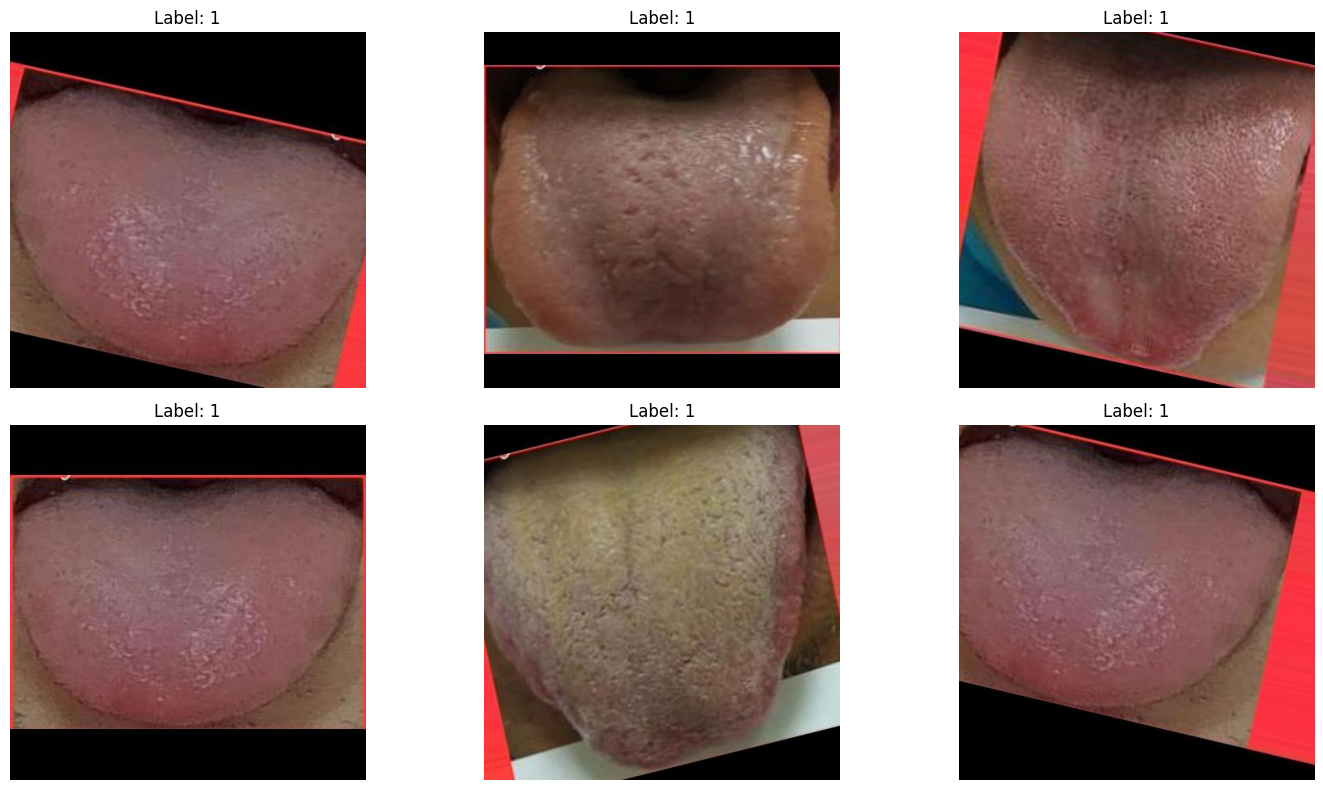

In [43]:
# Show a few sample images with their labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_df = df.sample(6, random_state=42).reset_index(drop=True)

plt.figure(figsize=(15, 8))
for i in range(len(sample_df)):
    img = mpimg.imread(sample_df['filepath'][i])
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {sample_df['label'][i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [67]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ConvNeXtTiny
from keras.applications.convnext import preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [68]:

csv_path = r'C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv'
df = pd.read_csv(csv_path)

image_dir = r'C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset'
df['full_path'] = df['filename'].apply(lambda x: os.path.join(image_dir, x.replace('\\', '/')))
df['label'] = df['label'].astype(str)

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
print("Train:", train_df['label'].value_counts().to_dict())
print("Val:", val_df['label'].value_counts().to_dict())


Train: {'1': 76, '0': 53}
Val: {'1': 20, '0': 13}


In [69]:

img_size = (224, 224)
batch_size = 16

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='full_path', y_col='label',
    target_size=img_size, batch_size=batch_size,
    class_mode='binary'
)
val_gen = val_datagen.flow_from_dataframe(
    val_df, x_col='full_path', y_col='label',
    target_size=img_size, batch_size=batch_size,
    class_mode='binary', shuffle=False
)


Found 129 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.


In [70]:

base_model = ConvNeXtTiny(include_top=False, input_shape=img_size + (3,), weights='imagenet')
base_model.trainable = True  # Fine-tune all layers

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_tiny (Functional)  (None, 7, 7, 768)         27820128  
                                                                 
 global_average_pooling2d_8  (None, 768)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_8 (Dropout)         (None, 768)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 769       
                                                                 
Total params: 27820897 (106.13 MB)
Trainable params: 27820897 (106.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:

class MCCCallback(keras.callbacks.Callback):
    def __init__(self, val_gen, y_true):
        super().__init__()
        self.val_gen = val_gen
        self.y_true = y_true
        self.mcc_scores = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.val_gen) > 0.5).astype(int)
        mcc = matthews_corrcoef(self.y_true, y_pred)
        self.mcc_scores.append(mcc)
        print(f"Epoch {epoch + 1} MCC: {mcc:.4f}")


In [72]:

y_train = train_df['label'].astype(int)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weights)

y_val_true = val_df['label'].astype(int).values
mcc_callback = MCCCallback(val_gen, y_val_true)

callbacks = [
    EarlyStopping(patience=6, restore_best_weights=True),
    ModelCheckpoint('convnext-t models/best_model_finetuned.keras', save_best_only=True),
    mcc_callback
]

history = model.fit(train_gen, validation_data=val_gen, epochs=30,
                    class_weight=class_weights, callbacks=callbacks)


Class Weights: {0: 1.2169811320754718, 1: 0.8486842105263158}
Epoch 1/30
3/3 [==============================] - 7s 2s/steploss: 0.7407 - accuracy: 
Epoch 1 MCC: 0.2152
9/9 [==============================] - 98s 10s/step - loss: 0.7407 - accuracy: 0.4574 - val_loss: 0.7004 - val_accuracy: 0.5455
Epoch 2/30
3/3 [==============================] - 6s 2s/steploss: 0.6345 - accuracy: 
Epoch 2 MCC: 0.3070
9/9 [==============================] - 75s 8s/step - loss: 0.6345 - accuracy: 0.6202 - val_loss: 0.6532 - val_accuracy: 0.6061
Epoch 3/30
3/3 [==============================] - 6s 2s/steploss: 0.6449 - accuracy: 
Epoch 3 MCC: 0.5316
9/9 [==============================] - 74s 8s/step - loss: 0.6449 - accuracy: 0.6047 - val_loss: 0.6360 - val_accuracy: 0.6970
Epoch 4/30
3/3 [==============================] - 6s 2s/steploss: 0.5640 - accuracy: 
Epoch 4 MCC: 0.5701
9/9 [==============================] - 75s 8s/step - loss: 0.5640 - accuracy: 0.7519 - val_loss: 0.6228 - val_accuracy: 0.7273
Epoch

In [73]:

val_gen.reset()
y_pred_probs = model.predict(val_gen).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_val_true, y_pred))
print("Classification Report:\n", classification_report(y_val_true, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_val_true, y_pred_probs))
print("MCC:", matthews_corrcoef(y_val_true, y_pred))


3/3 [==============================] - 7s 2s/step
Confusion Matrix:
 [[13  0]
 [ 5 15]]
Classification Report:
               precision    recall  f1-score   support

           0     0.7222    1.0000    0.8387        13
           1     1.0000    0.7500    0.8571        20

    accuracy                         0.8485        33
   macro avg     0.8611    0.8750    0.8479        33
weighted avg     0.8906    0.8485    0.8499        33

ROC AUC: 0.9884615384615384
MCC: 0.7359800721939873


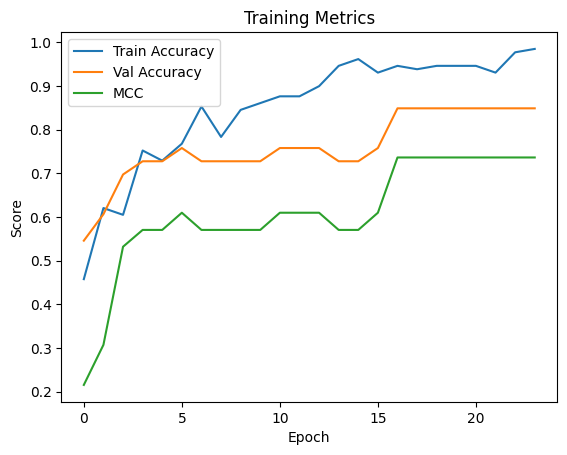

In [74]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(mcc_callback.mcc_scores, label='MCC')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title("Training Metrics")
plt.legend()
plt.show()


In [75]:

model.save('convnext-t models/final_model_finetuned.keras')
print("Final model saved to convnext-t models/")


Final model saved to convnext-t models/
